In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# file_path = 'C:/Users/Cecilia/data/raw/M056/M056_2025_02_26_11_00/M056_2025_02_26_11_00-2025-02-26-105954.txt'
# file_path = 'C:/Users/Cecilia/data/raw/M056/M056_2025_02_27_11_00/M056_2025_02_27_11_00-2025-02-27-110456.txt'
# file_path = 'C:/Users/Cecilia/data/raw/M056/M056_2025_02_28_11_15/M056_2025_02_28_11_15-2025-02-28-111533.txt'
file_path = 'C:/Users/Cecilia/data/raw/M056/M056_2025_03_01_11_45/M056_2025_03_01_11_45-2025-03-01-114721.txt'

# Initialize a list to store the extracted data
data = []

# Open and read the file
with open(file_path, "r") as file:
    for line in file:
        if line.startswith("D"):  # Check if the line starts with 'D'
            parts = line.split()  # Split the line into parts
            if len(parts) == 3:  # Ensure it has the expected structure
                time = int(parts[1])  # First integer value
                value = int(parts[2])  # Second integer value
                data.append((time, value))

# Create a DataFrame
df = pd.DataFrame(data, columns=["time", "value"])

# # Display the DataFrame
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Extracted Data", dataframe=df)

S {"reward": 3, "trial": 1, "catch_reward": 4, "cursor_match": 2, "catch_cursor_match": 5}

E {"lick": 6, "cursor_update": 8, "session_timer": 9, "motion": 7}


In [3]:
lick = df[df.value == 6].reset_index(drop=True)
total_lick_rate = len(lick)/3600
print(total_lick_rate)

0.13194444444444445


In [4]:
def compute_rate (x,winLen,overlap=0.5,zero=0,end=None):
    """
    x: list like data with times of event, in sec
    winLen: length of window in sec
    overlap: normalized overlap: (0,1)
    zero: begining of the time axis
    end: maximum of time axis
    ??window: window param of scipy.signal.get_window
    """
    assert overlap<1 and overlap>0, "bad overlap value"
    x=np.array(x)
    if end is None:
        end=x[-1]
#     if window is None:
#         window='boxcar'
#     win=scipy.signal.get_window(window,winLen)
    print(end)
    Range=np.arange(zero,end,(1-overlap)*winLen)
    out=[]
    for i,_ in enumerate(Range):
        a=x[np.logical_and(x>=Range[i],x<Range[i]+winLen)]
        out.append(len(a)/winLen)
    return np.array(out),Range

In [5]:
lick_rate, timestep = compute_rate(lick.time/1000, 1, overlap=0.9)
scale = 10

3574.758


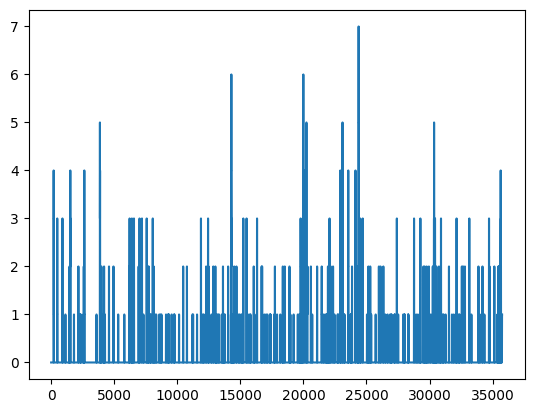

In [6]:
# lick_time, _ = np.histogram(lick.time, bins=np.arange(0, 3600000 + 1, 1))
# window_size = 1000
# window = np.ones(window_size) / window_size
# lick_rate = np.convolve(lick_time, window, mode='same')*1000
plt.plot(lick_rate);
# plt.plot(lick_time)
# plt.xlim([0, 60])

In [7]:
time_after_reward = 10
enter_reward = df[df.value == 3].reset_index(drop=True)
lick_rates = np.zeros([len(enter_reward), time_after_reward*scale])
fast_reaction_time = 5
fast_reaction = 0
for i in range(len(enter_reward)):
    start_time = int(np.floor(enter_reward.time[i]/1000))
    relative_rate = lick_rate[(timestep>start_time)&(timestep<start_time+time_after_reward)]
    relative_rate = np.pad(relative_rate, (0, max(0, time_after_reward*scale - len(relative_rate))), mode='constant', constant_values=0)
    lick_rates[i,:] = relative_rate
    
    if np.sum(lick_rate[(timestep>start_time)&(timestep<start_time+fast_reaction_time)]) > 0:
        fast_reaction = fast_reaction + 1
        
print('Reacted fast in: ' + str(fast_reaction) + ' out of ' + str(len(enter_reward)) + ' trials')
print('Probability of fast reaction: ' + str(fast_reaction/len(enter_reward)))

Reacted fast in: 20 out of 52 trials
Probability of fast reaction: 0.38461538461538464


In [8]:
time_after_reward = 10
enter_reward = df[df.value == 4].reset_index(drop=True)
catch_lick_rates = np.zeros([len(enter_reward), time_after_reward*scale])
fast_reaction_time = 5
fast_reaction = 0
for i in range(len(enter_reward)):
    start_time = int(np.floor(enter_reward.time[i]/1000))
    relative_rate = lick_rate[(timestep>start_time)&(timestep<start_time+time_after_reward)]
    relative_rate = np.pad(relative_rate, (0, max(0, time_after_reward*scale - len(relative_rate))), mode='constant', constant_values=0)
    catch_lick_rates[i,:] = relative_rate
    
    if np.sum(lick_rate[(timestep>start_time)&(timestep<start_time+fast_reaction_time)]) > 0:
        fast_reaction = fast_reaction + 1
        
print('Reacted fast in: ' + str(fast_reaction) + ' out of ' + str(len(enter_reward)) + ' trials')
print('Probability of fast reaction: ' + str(fast_reaction/len(enter_reward)))

Reacted fast in: 0 out of 4 trials
Probability of fast reaction: 0.0


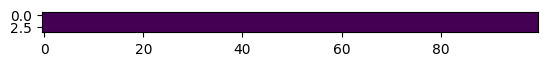

In [9]:
plt.imshow(catch_lick_rates);

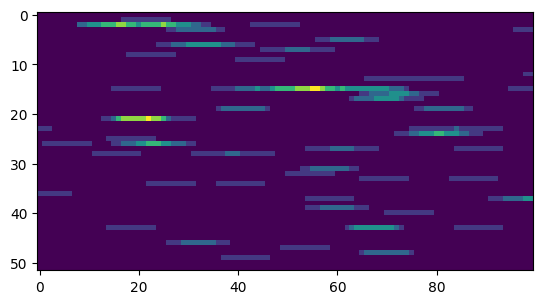

In [10]:
plt.imshow(lick_rates);

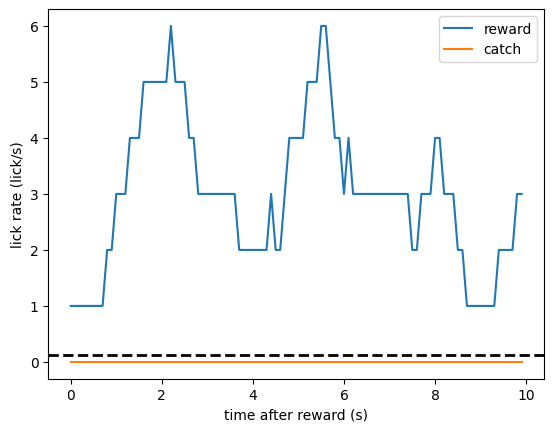

In [11]:
plt.plot(timestep[0:10*scale],np.max(lick_rates, axis=0),label='reward')
plt.plot(timestep[0:10*scale],np.max(catch_lick_rates, axis=0), label='catch')
plt.axhline(y=total_lick_rate, color='k', linestyle='--', linewidth=2)
plt.ylabel('lick rate (lick/s)')
plt.xlabel('time after reward (s)')
plt.legend()

In [12]:
time_after_reward = 10
enter_reward = df[df.value == 2].reset_index(drop=True)
lick_rates = np.zeros([len(enter_reward), time_after_reward*scale])
fast_reaction_time = 5
fast_reaction = 0
for i in range(len(enter_reward)):
    start_time = int(np.floor(enter_reward.time[i]/1000))
    relative_rate = lick_rate[(timestep>start_time)&(timestep<start_time+time_after_reward)]
    relative_rate = np.pad(relative_rate, (0, max(0, time_after_reward*scale - len(relative_rate))), mode='constant', constant_values=0)
    lick_rates[i,:] = relative_rate
    
    if np.sum(lick_rate[(timestep>start_time)&(timestep<start_time+fast_reaction_time)]) > 0:
        fast_reaction = fast_reaction + 1
        
print('Reacted fast in: ' + str(fast_reaction) + ' out of ' + str(len(enter_reward)) + ' trials')
print('Probability of fast reaction: ' + str(fast_reaction/len(enter_reward)))

Reacted fast in: 242 out of 647 trials
Probability of fast reaction: 0.3740340030911901


In [13]:
time_after_reward = 10
enter_reward = df[df.value == 5].reset_index(drop=True)
catch_lick_rates = np.zeros([len(enter_reward), time_after_reward*scale])
fast_reaction_time = 5
fast_reaction = 0
for i in range(len(enter_reward)):
    start_time = int(np.floor(enter_reward.time[i]/1000))
    relative_rate = lick_rate[(timestep>start_time)&(timestep<start_time+time_after_reward)]
    relative_rate = np.pad(relative_rate, (0, max(0, time_after_reward*scale - len(relative_rate))), mode='constant', constant_values=0)
    catch_lick_rates[i,:] = relative_rate
    
    if np.sum(lick_rate[(timestep>start_time)&(timestep<start_time+fast_reaction_time)]) > 0:
        fast_reaction = fast_reaction + 1
        
print('Reacted fast in: ' + str(fast_reaction) + ' out of ' + str(len(enter_reward)) + ' trials')
print('Probability of fast reaction: ' + str(fast_reaction/len(enter_reward)))

Reacted fast in: 27 out of 71 trials
Probability of fast reaction: 0.38028169014084506


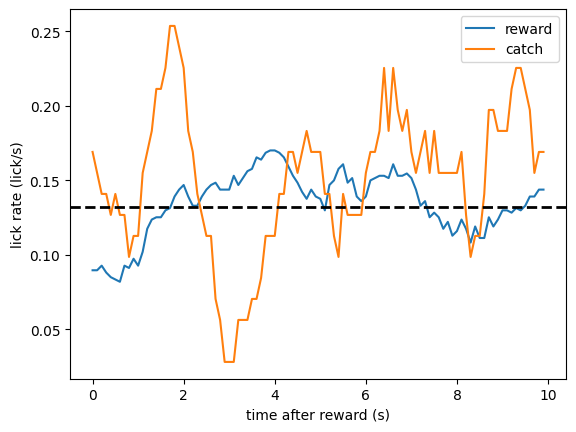

In [14]:
plt.plot(timestep[0:10*scale],np.mean(lick_rates, axis=0),label='reward')
plt.plot(timestep[0:10*scale],np.mean(catch_lick_rates, axis=0), label='catch')
plt.axhline(y=total_lick_rate, color='k', linestyle='--', linewidth=2)
plt.ylabel('lick rate (lick/s)')
plt.xlabel('time after reward (s)')
plt.legend()

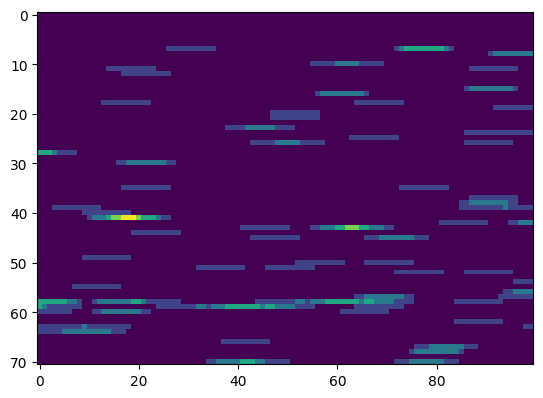

In [15]:
plt.imshow(catch_lick_rates);

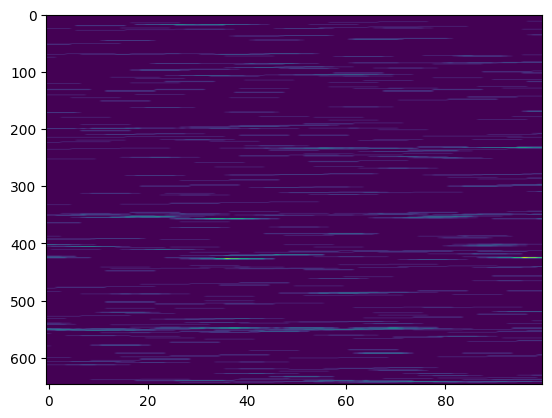

In [16]:
plt.imshow(lick_rates, aspect='auto');

Maybe look at this using "random" trials to check that it is not by chance